In [7]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [8]:
tdms_1150 = list()
tdms_1100 = list()
for file in os.listdir("../out/time-depth-models/"):
    if file.startswith("tdm_core_1150"):
        tdms_1150.append(file)
    elif file.startswith("tdm_core_1100"):
        tdms_1100.append(file)

In [9]:
tdms_1100

['tdm_core_1100_d18O_conventional.csv', 'tdm_core_1100_d18O_LR04stack_dtw.csv']

In [10]:
tdms_1150

['tdm_core_1150_d18O_bulk_split_1_core_1100_conventional_agemodel_out.csv',
 'tdm_core_1150_d18O_split_1_core_1100_conventional_agemodel_out.csv',
 'tdm_core_1150_aragonite_split_1_core_1100_conventional_agemodel_out.csv',
 'tdm_core_1150_aragonite_LR04stack_out.csv',
 'tdm_core_1150_d18O_bulk_split_1_LR04stack_out.csv',
 'tdm_core_1150_d18O_LR04stack_out.csv']

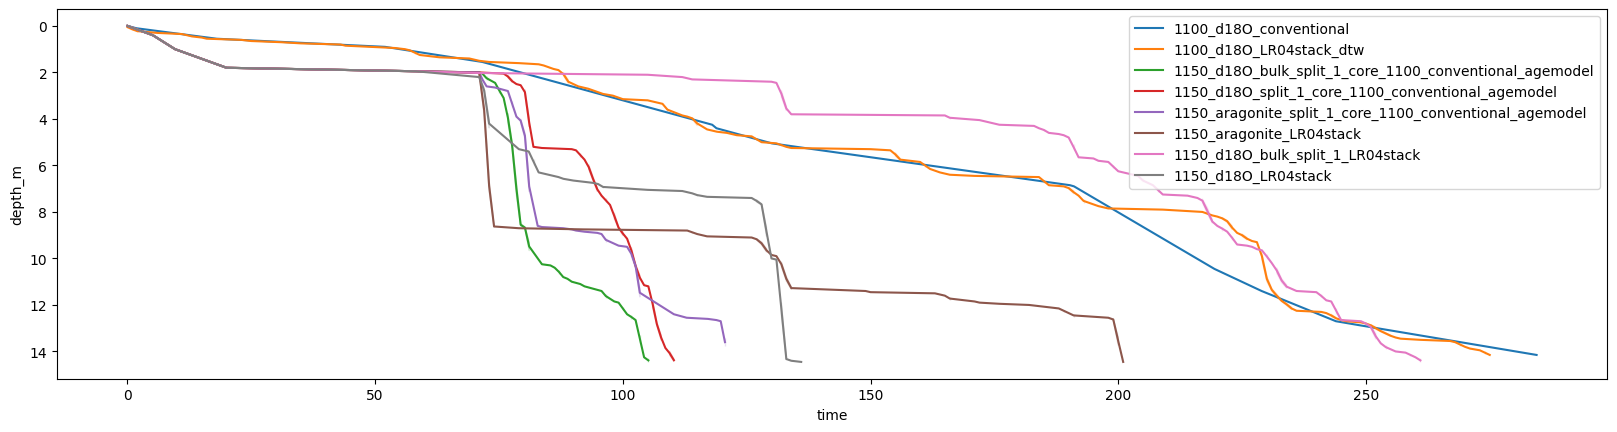

In [17]:
fig, ax = plt.subplots(1,1)
fig.set_figwidth(20)
for file in tdms_1100:
    label = file.split("tdm_core_1100_")[1]
    label = label.replace(".csv", "").replace("_out", "")
    df = pd.read_csv(f"../out/time-depth-models/{file}")
    sns.lineplot(ax=ax, x='time', y='depth_m', data=df, label=f"1100_{label}")
for file in tdms_1150:
    label = file.split("tdm_core_1150_")[1]
    label = label.replace(".csv", "").replace("_out", "")
    df = pd.read_csv(f"../out/time-depth-models/{file}")
    sns.lineplot(ax=ax, x='time', y='depth_m', data=df, label=f"1150_{label}")
ax.invert_yaxis()

In [18]:
fig.savefig("../out/figures/time-depth-models.svg")
fig.savefig("../out/figures/time-depth-models.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
